<div align="right">
Massimo Nocentini<br>
<small>
<br>September 20, 2016: Barnsley's fern, Henon's function, Mandelbrot's sets
<br>September 19, 2016: cleaning, probabilistic Sierpinski gasket
<br>April 2, 2016: refactoring
<br>February 9, 2016: big-bang, Catalan triangle
</small>
</div>
<br>
<div align="center">
<b>Abstract</b><br>
In this document we investigate, first, how the "modular" Catalan triangle, denoted by a Riordan array $\mathcal{C}$, can be <i>assembled inductively</i> avoiding raw matrix expansion (ie. brute force); second, probabilistic construction of the "modular" Pascal array, aka Sierpinski gasket; third, using the same probabilistic approach we draw Barnsley's fern and Mandelbrot's sets. All these topics share a fractal savor.
</div>

# Introduction

The scope behind this work, initially, was to provide an implementation for an *inductive* costruction of the Catalan array, denoted by $\mathcal{C}$ and defined as a matrix in the Riordan group, where coefficients are taken modulo 2. A formal characterization of this construction is given in a paper of Donatella Merlini and Massimo Nocentini, to appear in a suitable journal: such method allows us to avoid the "brute force" approach to expand $\mathcal{C}$ as a matrix and take each coefficien modulo 2; on the other hand, given a *principal cluster* of order $\alpha$, it is possible to build a principal cluster of order $\alpha+1$ with three block-wise operations.

Recognizing recursion under this approach, we exercise toward other fractal objects, according to probabilistic construction methods: we represent the Sierpinski gasket (which can be denoted by a Riordan array too), the Barnsley's fern, the Henon's function and, finally, the usual Mandelbrot's set.

Only the inductive definition of $\mathcal{C}$ is new and provided by us, the other objects are already known, we just use Python and this document to describe them in a nice prose, we hope.

The following cells load our definitions in the script `colouring.py` (the complete implementation isn't too long and it is attached in the very last section):

In [1]:
%matplotlib inline

and prepare the environment:

In [3]:
from fractals import *
from inpututils import python_code

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches

import sys
import sympy
import math
from sympy import *
from sympy.abc import x, n, z, t, k
from sympy.core.cache import *
    
clear_cache()    
    
init_printing(use_latex='mathjax') # for nice printing, a-la' TeX

sys.setrecursionlimit(100000)

# $\mathcal{C}_{\equiv_{2}}$ recursive construction

In this section we implement a bunch of simple function that allow us to build the modular array $\mathcal{C}_{\equiv_{2}}$ using an inductive recipe, avoiding raw matrix expansion as a matrix in the Riordan group. Since our argument is completely *inductive* we need a starting stone, the initial chunck of $\mathcal{C}$:

In [6]:
catalan_matrix = Matrix([
            [1,0,0,0,0,0],
            [1,1,0,0,0,0],
            [2,2,1,0,0,0],
            [5,5,3,1,0,0],
            [14,14,9,4,1,0],
            [42,42,28,14,5,1],
        ])
catalan_matrix

⎡1   0   0   0   0  0⎤
⎢                    ⎥
⎢1   1   0   0   0  0⎥
⎢                    ⎥
⎢2   2   1   0   0  0⎥
⎢                    ⎥
⎢5   5   3   1   0  0⎥
⎢                    ⎥
⎢14  14  9   4   1  0⎥
⎢                    ⎥
⎣42  42  28  14  5  1⎦

we consider the principal cluster of order 2, denoted by $\mathcal{C}_{\equiv_{2}}^{(2)}$, where coefficients are taken modulo 2:

In [7]:
alpha = 2
bound = 2**alpha
pc = catalan_matrix[:bound, :bound].applyfunc(lambda c: c % 2)
pc

⎡1  0  0  0⎤
⎢          ⎥
⎢1  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣1  1  1  1⎦

## Under the hood

According to theorems proved in the paper, the following definitions implement *block-wise* constructions:

In [4]:
python_code(triangle_copy, mirror_triangle, fill_odd_coeffs)

```python
def triangle_copy(source, target, point):
    pr, pc = point
    for r in range(source.rows):
        for c in range(r+1):
            target[pr + r, pc + c] = source[r,c]

def mirror_triangle(principal_cluster, point, mirror_segment):
    r, c = point
    for m in mirror_segment:
        for s in range(1, m+1):
            principal_cluster[r+(m-s), c-s] = principal_cluster[r+m, c+s]

def fill_odd_coeffs(principal_cluster, row, cols):
    principal_cluster[row, :cols] = ones(1, cols)    

```

to be used in the `build_modular_catalan` definition, which implements the whole inductive argument:

In [5]:
python_code(build_modular_catalan)

```python
def build_modular_catalan(principal_cluster, modulo=Integer(2)):
    d = Dummy()
    eq = Eq(modulo**d, principal_cluster.rows)
    sols = solve(eq, d)
    assert len(sols) is 1
    alpha = sols[0]
    
    end_of_principal_cluster = modulo**alpha
    next_alpha = modulo**(alpha + 1)
    next_pc = zeros(next_alpha, next_alpha)

    triangle_copy(principal_cluster, next_pc, (0,0))
    triangle_copy(principal_cluster, next_pc, 
                    (end_of_principal_cluster,end_of_principal_cluster))
    mirror_triangle(next_pc, (end_of_principal_cluster, end_of_principal_cluster-1), 
                    range(end_of_principal_cluster-1))
    fill_odd_coeffs(next_pc, next_alpha-1, end_of_principal_cluster)

    return next_pc

```

Finally, the following function `draw` allows us to iterate the inductive construction, showing a graphical representation of each newly generated object:

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)

def draw(order, principal_cluster, layout='usual'):
    for i in range(order):
        _ = colour_matrix(principal_cluster, strait= layout == 'strait')
        principal_cluster = build_modular_catalan(principal_cluster)

## Colouring with _usual_ layout

As a first attempt, we represent triangles with the *usual* layout, centered one, building $\mathcal{C}_{\equiv_{2}}^{(2)}, \mathcal{C}_{\equiv_{2}}^{(3)}, \mathcal{C}_{\equiv_{2}}^{(4)}$ and $\mathcal{C}_{\equiv_{2}}^{(5)}$, respectively:

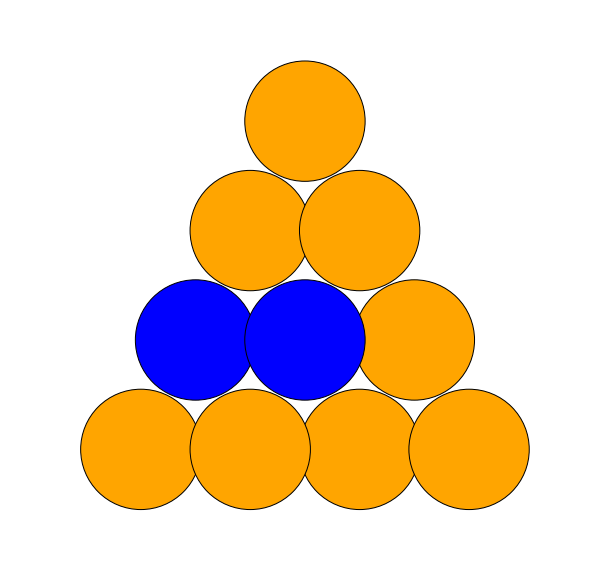

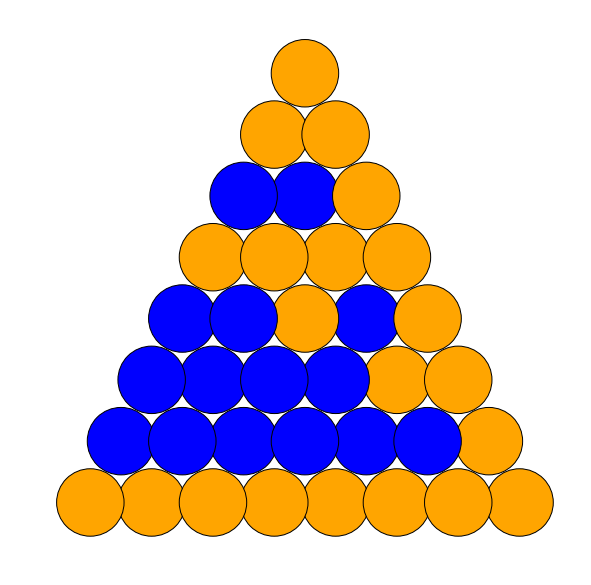

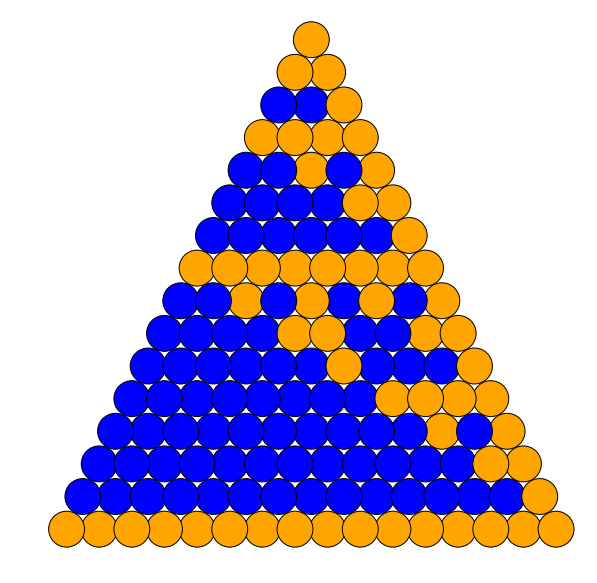

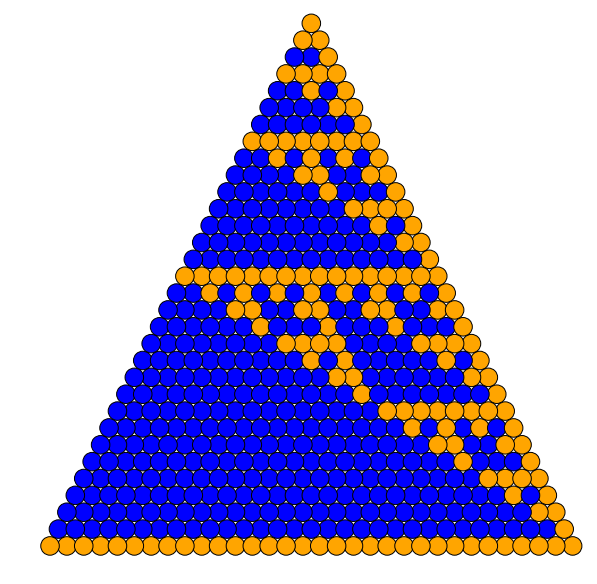

In [9]:
draw(order=4, principal_cluster=pc, layout='usual')

## Colouring with _strait_ layout

We represent the same sequence of principal clusters using a *strait* layout, where each circle has coordinates
$(x,y) \in \mathbb{N}\times\mathbb{N}$.

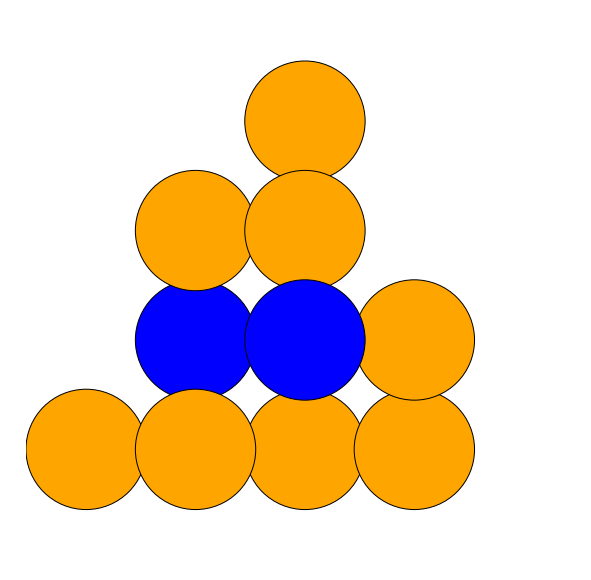

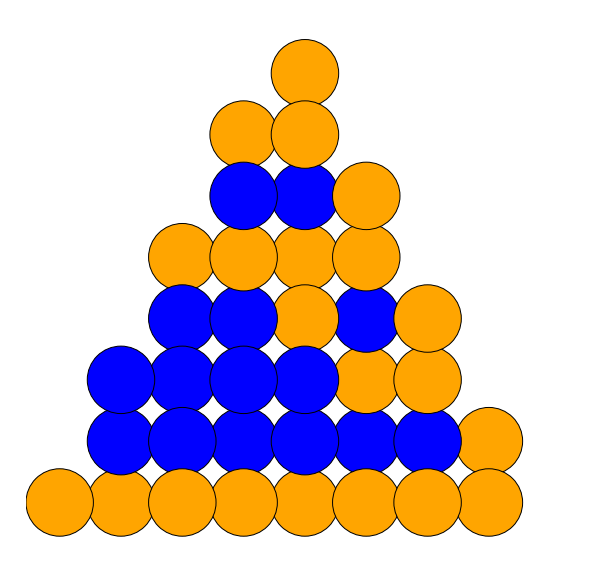

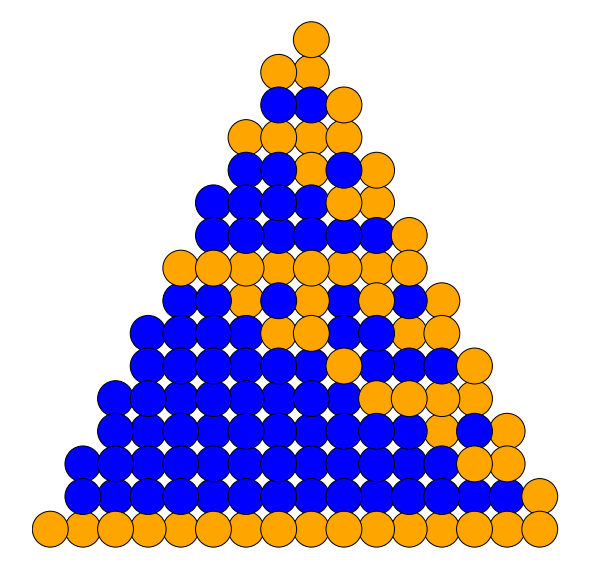

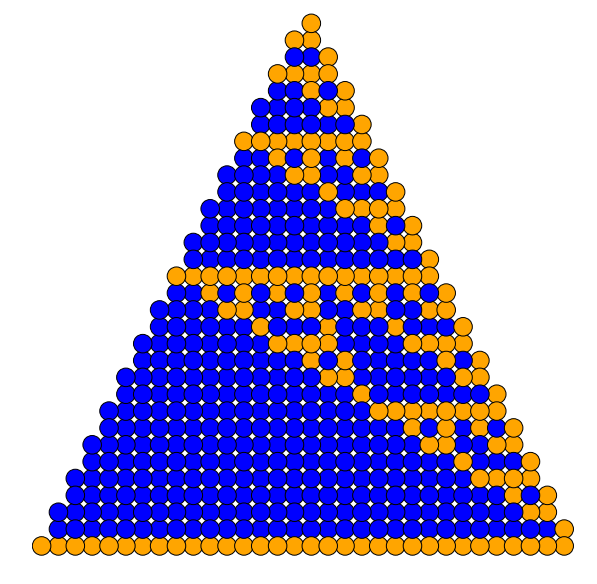

In [8]:
draw(order=4, principal_cluster=pc, layout='strait')

# Probabilistic constructions

While the reading of [Doing Math with Python][as], we found very interesting a probabilistic approach to draw recursively-defined objects of our interest. For the sake of clarity and exercise, we reproduce them in the following sections, adding some details and coding them in a Pythonic way.

A big thank you, Amit Saha :D

[as]:https://www.nostarch.com/doingmathwithpython

In [9]:
import random

## Sierpinski gasket, aka the Riordan array $\mathcal{P}_{\equiv_{2}}$

Define the following three functions, each one of them consumes a coordinate in the Euclidean plane and returns a new point; moreover, we pair each transformer with a color, in order to see the region "mapped" by each one of them.

In [181]:
def transform_one(coord):
    x, y = coord
    return .5*x, .5*y

def transform_two(coord):
    x, y = coord
    return .5*x + .5, .5*y + .5

def transform_three(coord):
    x, y = coord
    return .5*x + 1, .5*y

workers = [(transform_one, 'red'), (transform_two, 'blue'), (transform_three, 'green')]

Functions for application are choosen by sampling according to the *uniform distribution*. Choose a number of points $p$ to put on the plane and, starting from $(0,0)$, repeatedly apply one of the transformation functions defined before:

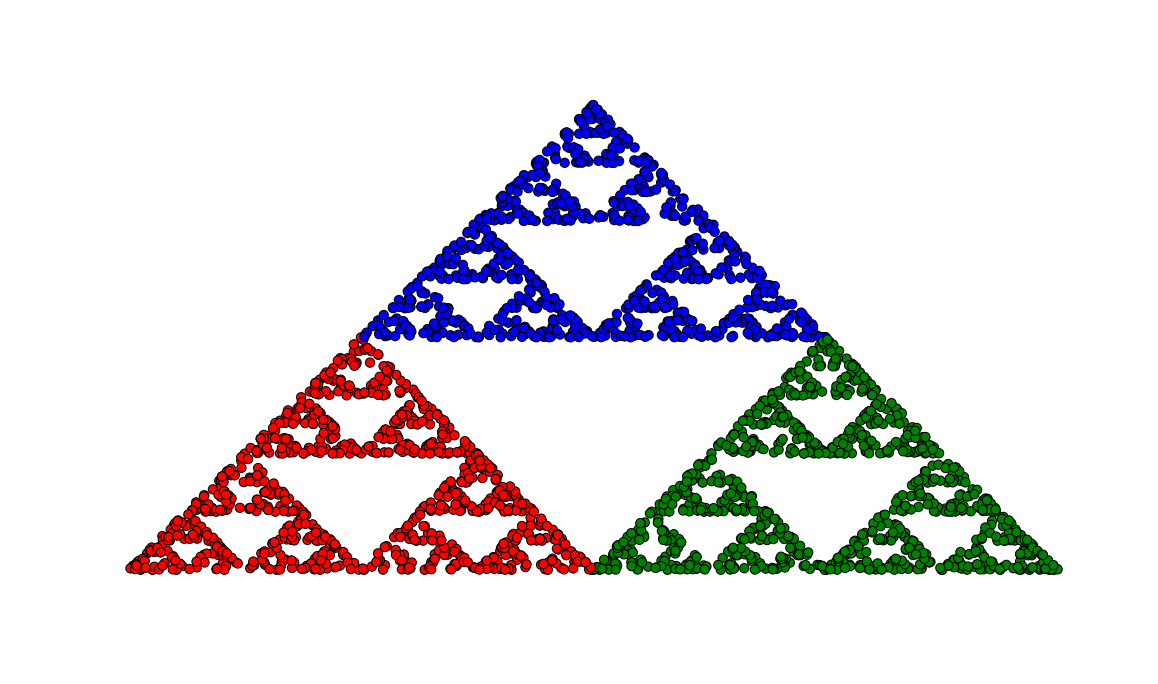

In [184]:
plt.rcParams['figure.figsize'] = (20, 20)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')

coord = (0, 0)

for p in range(3000):
    
    transform, color = random.choice(workers)
    coord = transform(coord)
    
    patch = patches.Circle(coord, .01, facecolor=color, fill=True)
    ax3.add_patch(patch)
    
    
ax3.set_xlim(-.2,2.2)
ax3.set_ylim(-.2,1.2)
ax3.set_axis_off()
plt.show()

## Barnsley's fern

The following fractal was introduced by English mathematician Barnsley, abstracting a [fern][wiki]; here, transformers have to be choosen according to a given distribution, which isn't uniform as in the previous case.

[wiki]:https://en.wikipedia.org/wiki/Barnsley_fern

In [203]:
def transform_one(coord):
    x, y = coord
    return (.85*x + .04*y, -.04*x + .85*y + 1.6)

def transform_two(coord):
    x, y = coord
    return (.2*x + .26*y, -.23*x + .22*y + 1.6)

def transform_three(coord):
    x, y = coord
    return (-.15*x - .28*y, -.26*x + .24*y + 0.44)

def transform_four(coord):
    x, y = coord
    return (0, .16*y)

workers = [(transform_one, 'red', .80)
           , (transform_two, 'blue', .09)
           , (transform_three, 'green', .09)
           , (transform_four, 'black', .02)]

The following is an interesting [implementation pattern][ip] to build a population of objects according to a given distribution, in this case coded in the third components of tuples in `workers` list:

[ip]:https://docs.python.org/3/library/random.html#examples-and-recipes

In [204]:
population = [(w,c) for w, c, p in workers for i in range(int(p*100))]
random.shuffle(population)

Representation of a fern using 3000 points:

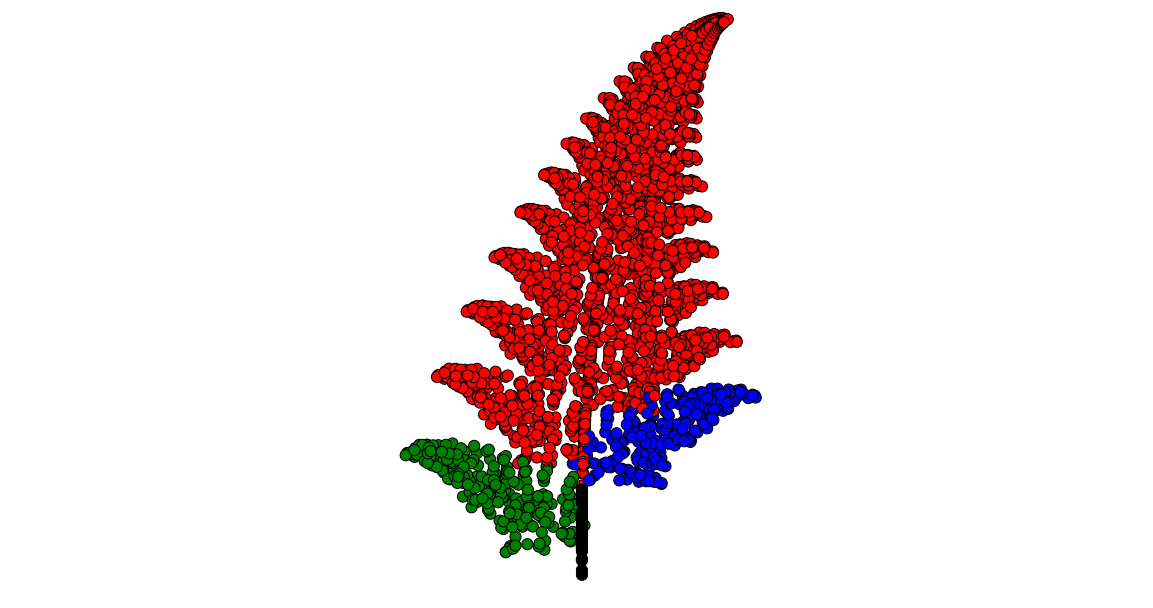

In [206]:
plt.rcParams['figure.figsize'] = (20, 20)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')

coord = (0, 0)

for p in range(3000):
    
    transform, color = random.choice(population)
    coord = transform(coord)
    
    patch = patches.Circle(coord, radius=.1, facecolor=color, fill=True)
    ax3.add_patch(patch)
    
    
ax3.set_xlim(-10,10)
ax3.set_ylim(-.2,10.2)
ax3.set_axis_off()
plt.show()

## Henon's function

>This is an example of a dynamical system, and the curved lines that
all the points seem attracted to are referred to as attractors. To learn more
about this function, dynamical systems, and fractals in general, you may
want to refer to *Fractals: A Very Short Introduction by Kenneth Falconer
(Oxford University Press, 2013)*

In [212]:
def transform(coord):
    x, y = coord
    return (y + 1 - 1.4*x**2, .3*x)

>Extra credit for writing another program to create an animated figure
showing the points starting to lie along the curves! See https://www.youtube.com/watch?v=76ll818RlpQ

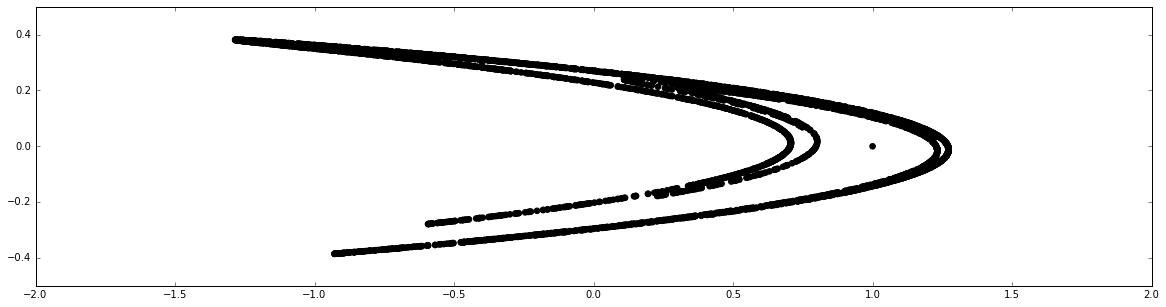

In [220]:
plt.rcParams['figure.figsize'] = (20, 20)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, aspect='equal')

coord = (0,0)

for p in range(5000):
    
    coord = transform(coord)
    
    patch = patches.Circle(coord, radius=.01, facecolor='black', fill=True)
    ax3.add_patch(patch)
    
    
ax3.set_xlim(-2,2)
ax3.set_ylim(-.5,.5)
#ax3.set_axis_off()
plt.show()

## Mandelbrot's sets

Lot of references exist for Mandelbrot's fractals, here we deal with the ["classic" one][wiki]. Also, plenty implementations are provided:

   - http://forthescience.org/blog/2010/07/12/the-mandelbrot-set-in-python/
   - https://rosettacode.org/wiki/Mandelbrot_set
   - https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en

to name just a few...

Before play and understand the `plt.imshow` function:

[wiki]:https://en.wikipedia.org/wiki/Mandelbrot_set

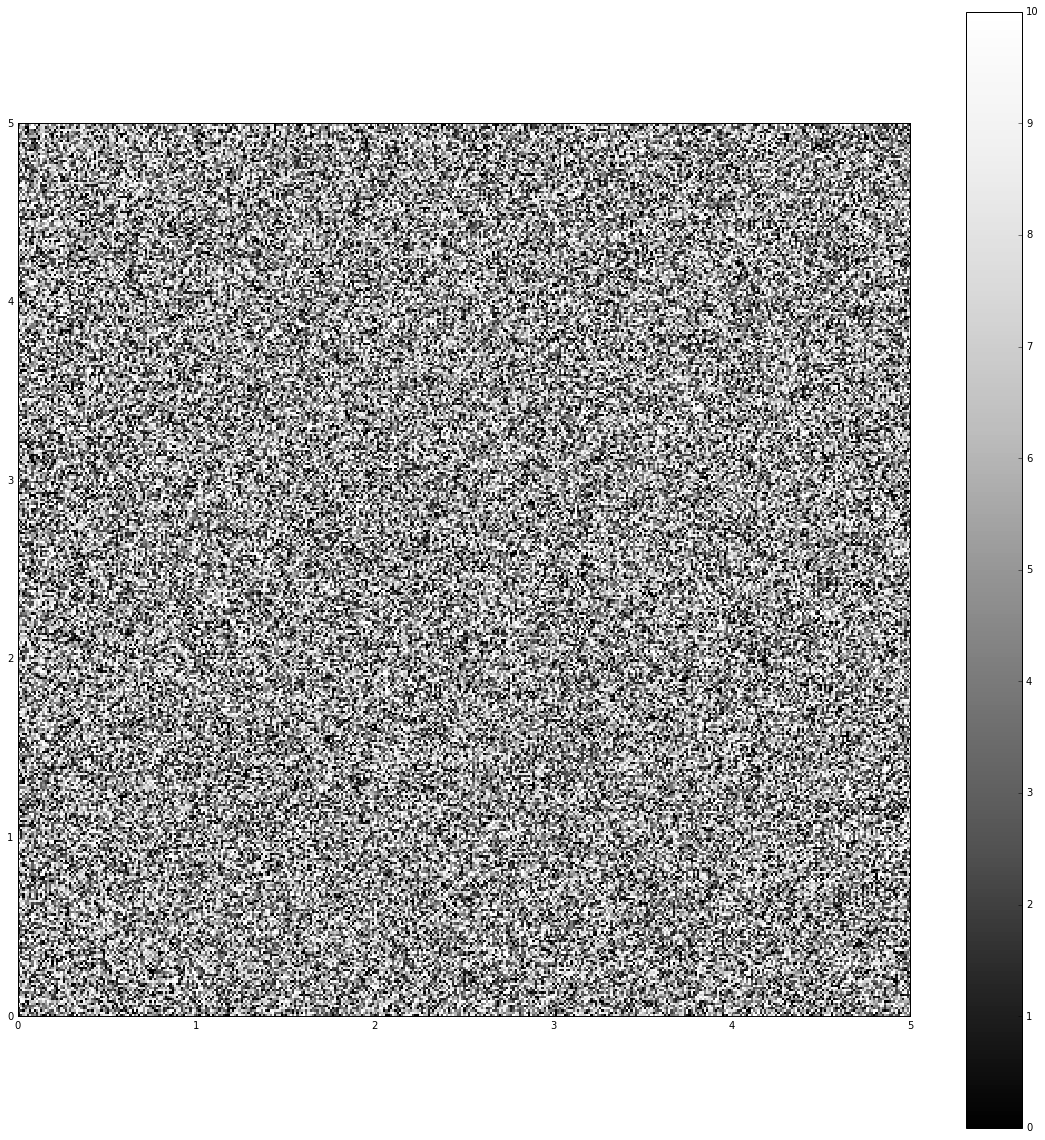

In [255]:
points = 400 + 1
image = [[random.randint(0,10) for x in range(points)] for y in range(points)]
plt.imshow(image, origin='lower', extent=(0,5,0,5), cmap=cm.Greys_r, interpolation='nearest')
plt.colorbar()
plt.show()

function `linspace` is kept from [here][linspace], while `worker` is an implementation of guidelines in cited book, using complex numbers built-in support by Python:

[linspace]:http://stackoverflow.com/questions/12334442/does-python-have-a-linspace-function-in-its-std-lib

In [3]:
def linspace(a, b, n=100):
    if n < 2:
        return b
    diff = (float(b) - a)/(n - 1)
    return [diff * i + a  for i in range(n)]

def worker(x, y, max_iterations=1000):
    
    z = 0 + 0j
    c = x + y*1j
    
    for iteration in range(max_iterations):
        z = z**2 + c
        if abs(z) > 2: break
        
    return iteration

>This algorithm is usually referred to as the escape-time algorithm. When
the maximum number of iterations is reached before a point’s magnitude
exceeds 2, that point belongs to the Mandelbrot set and is colored white.
The points that exceed the magnitude within fewer iterations are said to
“escape”; they don’t belong to the Mandelbrot set and are colored black.
You can experiment by decreasing and increasing the number of points
along each axis. Decreasing the number of points will lead to a grainy
image, while increasing them will result in a more detailed image.

In [11]:
%%time

points = 500
xs = linspace(-2.5,1, points)
ys = linspace(-1,1, points)
image = [[worker(x, y) for x in xs] for y in ys]

CPU times: user 2min 36s, sys: 50 ms, total: 2min 36s
Wall time: 2min 36s


just pause and look at execution times, then draw the fractal:

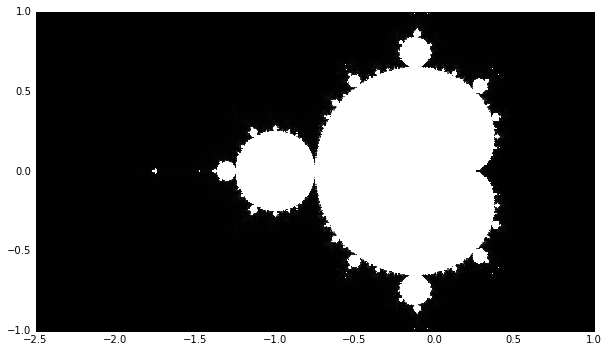

In [12]:
plt.imshow(image, origin='lower', extent=(-2.5,1,-1,1), cmap=cm.Greys_r, interpolation='nearest')
plt.show()

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.